In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

In [21]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/test.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')

df

,Station,Connection,Time,Name
0,0,1,10,A
1,1,3,10,B
2,1,2,10,B
3,2,7,10,C
4,2,6,10,C
5,2,4,10,C
6,2,1,10,C
7,3,9,10,D
8,3,4,10,D
9,3,1,10,D


In [22]:
MG = nx.MultiGraph()

In [23]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [24]:
MG

In [25]:
print(MG.adj)

{0: {1: {0: {'weight': 10}}}, 1: {0: {0: {'weight': 10}}, 3: {0: {'weight': 10}, 1: {'weight': 10}}, 2: {0: {'weight': 10}, 1: {'weight': 10}}}, 3: {1: {0: {'weight': 10}, 1: {'weight': 10}}, 9: {0: {'weight': 10}, 1: {'weight': 10}}, 4: {0: {'weight': 10}, 1: {'weight': 10}}}, 2: {1: {0: {'weight': 10}, 1: {'weight': 10}}, 7: {0: {'weight': 10}, 1: {'weight': 10}}, 6: {0: {'weight': 10}, 1: {'weight': 10}}, 4: {0: {'weight': 10}, 1: {'weight': 10}}}, 7: {2: {0: {'weight': 10}, 1: {'weight': 10}}, 8: {0: {'weight': 10}, 1: {'weight': 10}}}, 6: {2: {0: {'weight': 10}, 1: {'weight': 10}}}, 4: {2: {0: {'weight': 10}, 1: {'weight': 10}}, 3: {0: {'weight': 10}, 1: {'weight': 10}}, 5: {0: {'weight': 10}, 1: {'weight': 10}}}, 9: {3: {0: {'weight': 10}, 1: {'weight': 10}}}, 5: {4: {0: {'weight': 10}, 1: {'weight': 10}}}, 8: {7: {0: {'weight': 10}, 1: {'weight': 10}}}}


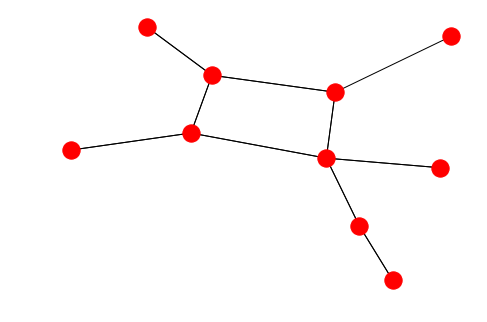

In [29]:
nx.draw(MG, label=True)
plt.show()

In [30]:
shortestMulti = nx.johnson(MG)
print(shortestMulti)
print(shortestMulti[1][5])
print(shortestMulti[1][5][1])

{0: {0: [0], 1: [0, 1], 3: [0, 1, 3], 2: [0, 1, 2], 9: [0, 1, 3, 9], 4: [0, 1, 3, 4], 7: [0, 1, 2, 7], 6: [0, 1, 2, 6], 5: [0, 1, 3, 4, 5], 8: [0, 1, 2, 7, 8]}, 1: {1: [1], 0: [1, 0], 3: [1, 3], 2: [1, 2], 9: [1, 3, 9], 4: [1, 3, 4], 7: [1, 2, 7], 6: [1, 2, 6], 5: [1, 3, 4, 5], 8: [1, 2, 7, 8]}, 3: {3: [3], 1: [3, 1], 9: [3, 9], 4: [3, 4], 0: [3, 1, 0], 2: [3, 1, 2], 5: [3, 4, 5], 7: [3, 1, 2, 7], 6: [3, 1, 2, 6], 8: [3, 1, 2, 7, 8]}, 2: {2: [2], 1: [2, 1], 7: [2, 7], 6: [2, 6], 4: [2, 4], 0: [2, 1, 0], 3: [2, 1, 3], 8: [2, 7, 8], 5: [2, 4, 5], 9: [2, 1, 3, 9]}, 7: {7: [7], 2: [7, 2], 8: [7, 8], 1: [7, 2, 1], 6: [7, 2, 6], 4: [7, 2, 4], 0: [7, 2, 1, 0], 3: [7, 2, 1, 3], 5: [7, 2, 4, 5], 9: [7, 2, 1, 3, 9]}, 6: {6: [6], 2: [6, 2], 1: [6, 2, 1], 7: [6, 2, 7], 4: [6, 2, 4], 0: [6, 2, 1, 0], 3: [6, 2, 1, 3], 8: [6, 2, 7, 8], 5: [6, 2, 4, 5], 9: [6, 2, 1, 3, 9]}, 4: {4: [4], 2: [4, 2], 3: [4, 3], 5: [4, 5], 1: [4, 2, 1], 7: [4, 2, 7], 6: [4, 2, 6], 9: [4, 3, 9], 0: [4, 2, 1, 0], 8: [4, 2, 7

In [565]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes
        random.shuffle(self.nodes)
        print(type(self.nodes))
        
        
    
    def shuffleGenes(self):
        print("Before :", self.nodes)
        random.shuffle(self.nodes)
        print("After :", self.nodes) 
        
        
    #Order Changing Mutation, 1 is selected thanks to Pm probability then exhanged with the other node(cant duplicate)
    def mutationGene(self, Pm):
        self.Pm = Pm
        print(Pm)
        for i in self.nodes:
            self.randMutate = random.random()
            print("rand = ", self.randMutate)
            print("node = ",i)
            if self.randMutate < self.Pm:
                self.a = random.randint(1,len(self.nodes)-1)
                print('self.a = ', self.a)
                print("Warning mutation, before = ", i)
                self.nodes[[i, self.a]] = self.nodes[[self.a, i]]
                print("Modified to = ", self.a)
                print(self.nodes)
                
    
    def fitnessScore(self):
        return 0
    
    
    
    def pathWay(self):
        return 0
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes    

In [566]:
def crossover(chromo1, chromo2):
    return 0

In [567]:
len(shortestMulti)

10

In [568]:
a = Chromosome(df.Station.unique())

<class 'numpy.ndarray'>


In [569]:
print(a)

Chromosome :|1|6|0|7|3|2|4|5|8|9|


In [577]:
a.shuffleGenes()

Before : [8 7 4 6 2 0 5 1 9 3]
After : [5 1 6 3 9 4 8 0 2 7]


In [578]:
a.mutationGene(0.3)

0.3
rand =  0.3383236936301637
node =  5
rand =  0.7146206732434288
node =  1
rand =  0.4645893755468714
node =  6
rand =  0.5689266241262699
node =  3
rand =  0.15902069501844618
node =  9
self.a =  9
Warning mutation, before =  9
Modified to =  9
[5 1 6 3 9 4 8 0 2 7]
rand =  0.01407658981772597
node =  4
self.a =  8
Warning mutation, before =  4
Modified to =  8
[5 1 6 3 2 4 8 0 9 7]
rand =  0.2940571253965353
node =  8
self.a =  2
Warning mutation, before =  8
Modified to =  2
[5 1 9 3 2 4 8 0 6 7]
rand =  0.7780798949814545
node =  0
rand =  0.8454657765387369
node =  6
rand =  0.9864078963486779
node =  7


In [579]:
a

Chromosome :|5|1|9|3|2|4|8|0|6|7|

In [373]:
population = []
for i in range(0,10,1):
    population = population + [Chromosome(df.Station.unique())]

In [375]:
population

[Chromosome :|8|7|6|9|4|2|0|1|5|3|,
 Chromosome :|1|0|6|4|8|7|3|2|5|9|,
 Chromosome :|3|5|7|4|6|9|0|1|8|2|,
 Chromosome :|8|2|7|6|1|0|4|5|9|3|,
 Chromosome :|5|8|1|7|3|0|2|9|6|4|,
 Chromosome :|2|0|3|1|9|4|8|6|5|7|,
 Chromosome :|7|6|1|4|2|3|8|9|0|5|,
 Chromosome :|6|3|9|2|4|7|1|8|0|5|,
 Chromosome :|0|3|4|1|7|9|6|5|8|2|,
 Chromosome :|3|5|7|1|2|0|8|4|9|6|]

In [378]:
population[1]

Chromosome :|0|6|4|2|1|7|3|9|8|5|

In [377]:
population[1].shuffleGenes()

Before : [1 0 6 4 8 7 3 2 5 9]
After : [0 6 4 2 1 7 3 9 8 5]


In [383]:
random.random()

0.06805322251603141